In [1]:
import MMGPD
import numpy as np
import matplotlib.pyplot as plt


In [2]:

def generate_skewed_random_values(initial, final, num_points):

    # Ensure initial is less than final
    if initial >= final:
        raise ValueError("Initial value must be less than final value")

    # Generate values in the range [0, 1]
    uniform_random_values = np.random.rand(num_points)
    
    # Apply the transformation to skew values towards initial
    skewed_values = np.power(uniform_random_values,3)
    
    # Transform values back to the range [initial, final], If you're confused the second part is calculated first.
    scaled_values = initial + (final - initial) * skewed_values
    # Remove zero values
    non_zero_values = scaled_values[scaled_values != initial]

    # Sort the values in ascending order
    sorted_values = np.sort(non_zero_values)
    return sorted_values



In [3]:
xValues = generate_skewed_random_values(0, 1, 1000)
# Generate results using a list comprehension
t = -1
results = [MMGPD.xGPD("HGAG23", "9", "E", "dv", item, t) for item in xValues] # Change flavour if you want: uv,dv ONLY/ No ubar/dbar

# Convert the list to a NumPy array if needed
results = np.array(results)


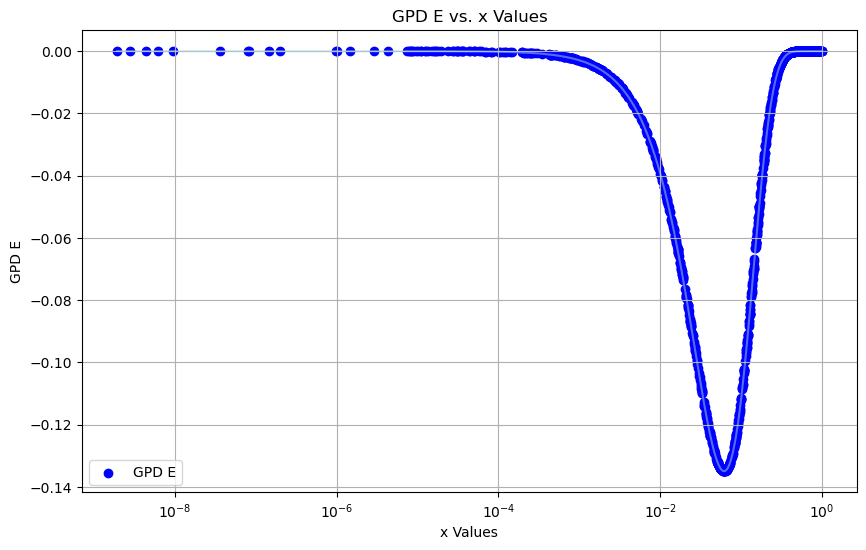

In [4]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(xValues, results, color='blue', label='GPD E')
plt.plot(xValues, results, color='lightblue', alpha=0.5)  # Optional line connecting the points
plt.title('GPD E vs. x Values')
plt.xscale('log')
plt.xlabel('x Values')
plt.ylabel('GPD E')
plt.legend()
plt.grid()
plt.show()